In [104]:
from qiskit import *
%matplotlib inline

In [105]:
from qiskit.visualization import plot_histogram

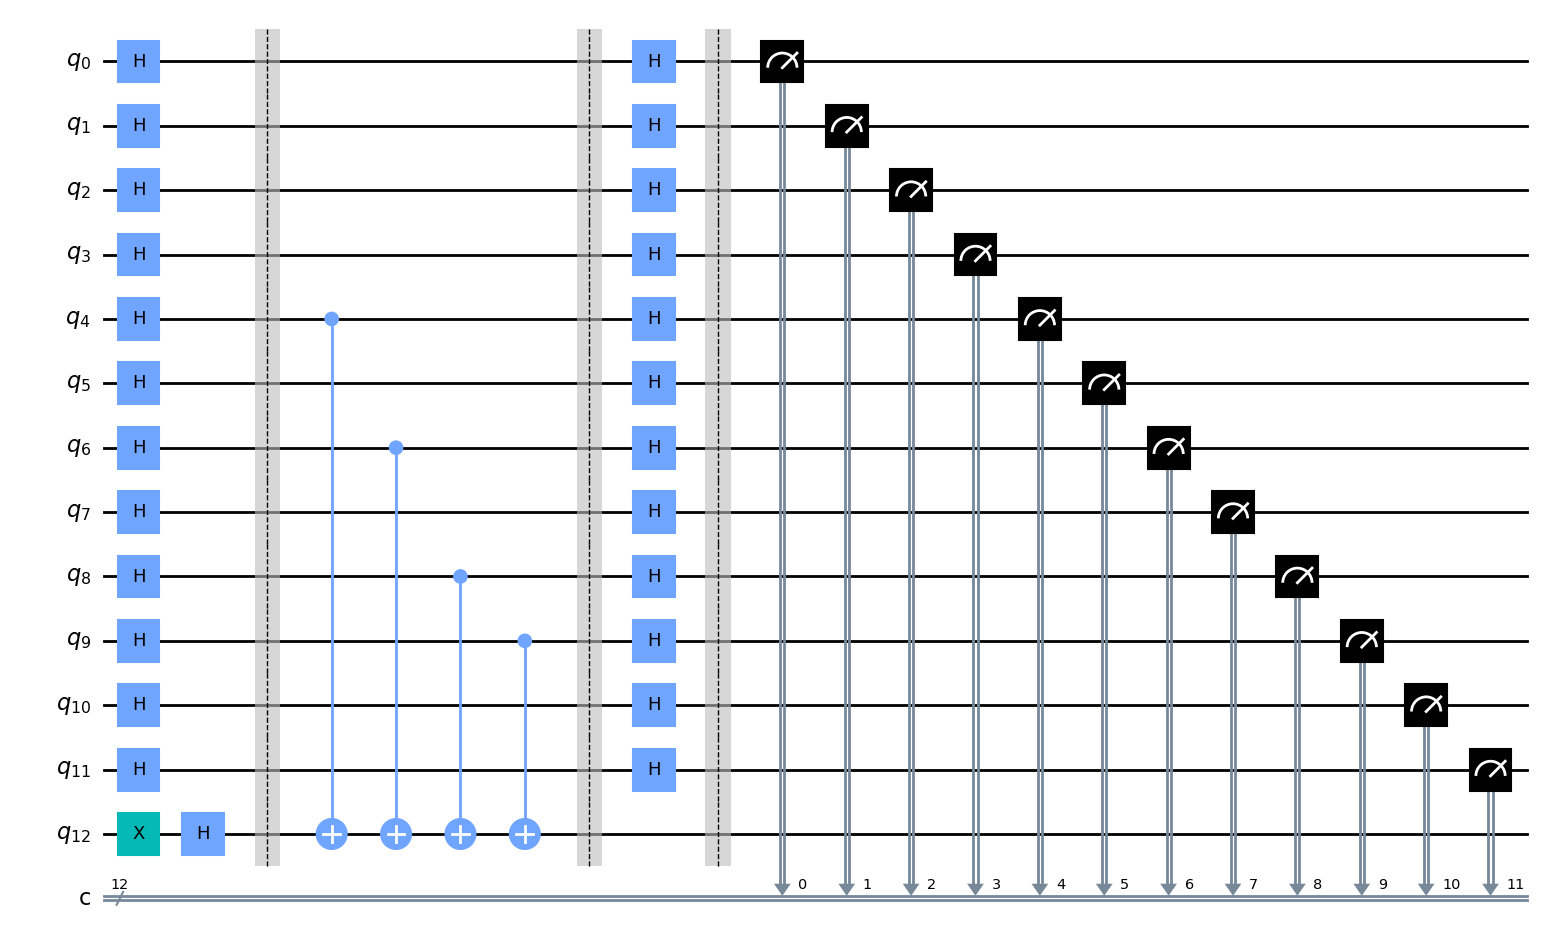

In [127]:
number = "001101010000"


circuit = QuantumCircuit(len(number)+1, len(number))


for qbit in range(len(number)):
    circuit.h(qbit)

circuit.x(len(number))
circuit.h(len(number))



circuit.barrier()
    
for ii, yesno in enumerate(reversed(number)):
    if yesno == '1':
        circuit.cx(ii, len(number))
    
circuit.barrier()

circuit.h(range(len(number)))

circuit.barrier()

circuit.measure(range(len(number)), range(len(number)))
    
circuit.draw("mpl")

In [128]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'001101010000': 1}


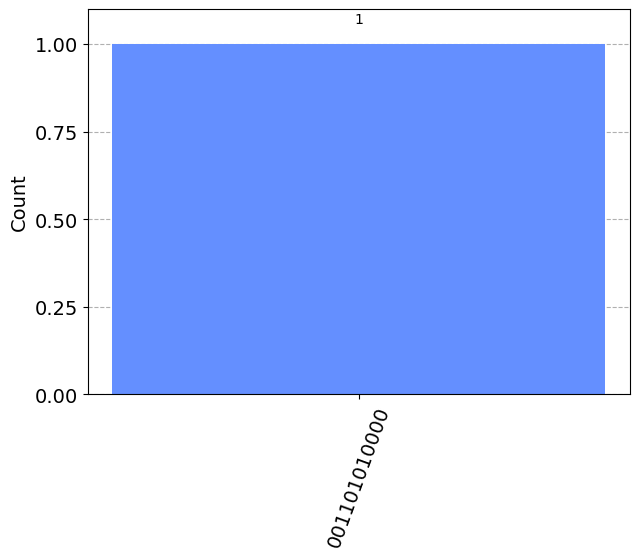

In [129]:
plot_histogram(counts)

In [130]:
result_num = list(counts.keys())[0]
print(f"Your number is: {int(result_num, 2)}")

Your number is: 848
